# Project Exhibition

Flight Fare Prediction

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
train_data = pd.read_excel("/content/Data_Train.xlsx")
train_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [ ]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [ ]:
train_data.shape

(10683, 11)

In [ ]:
train_data["Duration"].value_counts()

2h 50m     550
1h 30m     386
2h 55m     337
2h 45m     337
2h 35m     329
          ... 
33h 45m      1
19h 50m      1
32h 55m      1
31h 50m      1
30h 25m      1
Name: Duration, Length: 368, dtype: int64

In [ ]:
train_data.dropna(inplace = True)

In [ ]:
train_data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64


#EDA


In [ ]:
train_data["Journey_Day"] = pd.to_datetime(train_data.Date_of_Journey, format = "%d/%m/%Y").dt.day

In [ ]:
train_data["Journey_Month"] = pd.to_datetime(train_data["Date_of_Journey"], format = "%d/%m/%Y").dt.month

In [ ]:
train_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3


In [ ]:
train_data.drop(["Date_of_Journey"], axis =1, inplace = True)

In [ ]:
train_data["Dep_Hour"] = pd.to_datetime(train_data["Dep_Time"]).dt.hour
train_data["Dep_Min"] = pd.to_datetime(train_data["Dep_Time"]).dt.minute
train_data.drop(["Dep_Time"], axis = 1,inplace = True)
train_data.head()

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,Dep_Hour,Dep_Min
0,IndiGo,Banglore,New Delhi,BLR → DEL,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,13:15,7h 25m,2 stops,No info,7662,1,5,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,04:25 10 Jun,19h,2 stops,No info,13882,9,6,9,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,23:30,5h 25m,1 stop,No info,6218,12,5,18,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,21:35,4h 45m,1 stop,No info,13302,1,3,16,50


In [ ]:
train_data["Arrival_Hour"] = pd.to_datetime(train_data["Arrival_Time"]).dt.hour
train_data["Arrival_Min"] = pd.to_datetime(train_data["Arrival_Time"]).dt.minute
train_data.drop(["Arrival_Time"],axis = 1, inplace =True)
train_data.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,Dep_Hour,Dep_Min,Arrival_Hour,Arrival_Min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,9,6,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,5,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,1,3,16,50,21,35


In [ ]:
duration = list(train_data["Duration"])
for i in range(len(duration)):
  if len(duration[i].split()) != 2:
    if "h" in duration[i]:
      duration[i] = duration[i].strip() + " 0m" 
    else:
      duration[i] = "0h "+ duration[i]

duration_hours = []
duration_mins = []
for i in range(len(duration)):
  duration_hours.append(int(duration[i].split(sep = "h")[0]))
  duration_mins.append(int(duration[i].split(sep = "m")[0].split()[-1]))

In [ ]:
train_data["Duration_Hours"] = duration_hours
train_data["Duration_Mins"] = duration_mins
train_data.drop(["Duration"], axis = 1, inplace = True)
train_data.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,Dep_Hour,Dep_Min,Arrival_Hour,Arrival_Min,Duration_Hours,Duration_Mins
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,1,3,16,50,21,35,4,45



#Handling Categorical Data

In [ ]:
train_data["Airline"].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

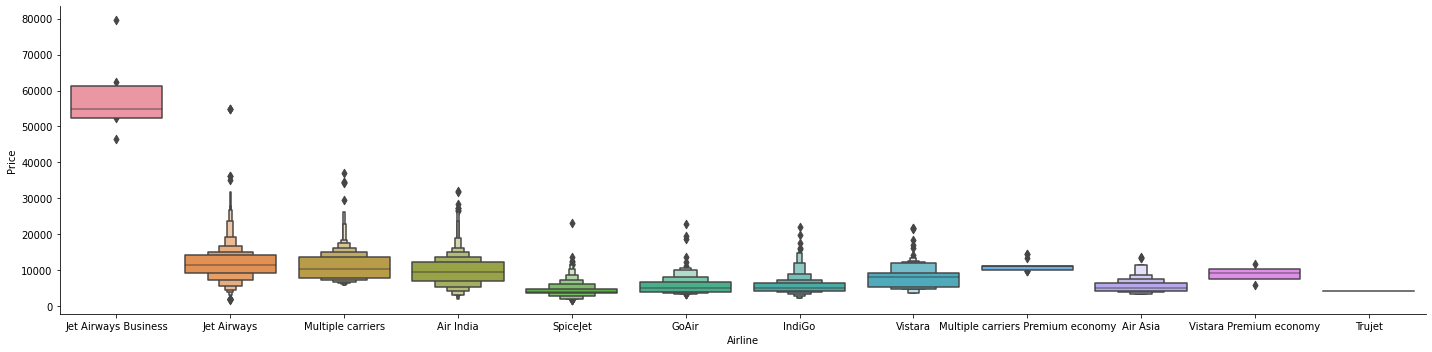

In [ ]:
sns.catplot(y="Price",x = "Airline", data = train_data.sort_values("Price",ascending = False),kind= "boxen",height = 5,aspect = 4)

In [ ]:
Airline = train_data[["Airline"]]
Airline = pd.get_dummies(Airline, drop_first = True)
Airline.head()

,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy
0,0,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0


In [ ]:
train_data["Source"].value_counts()

Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64

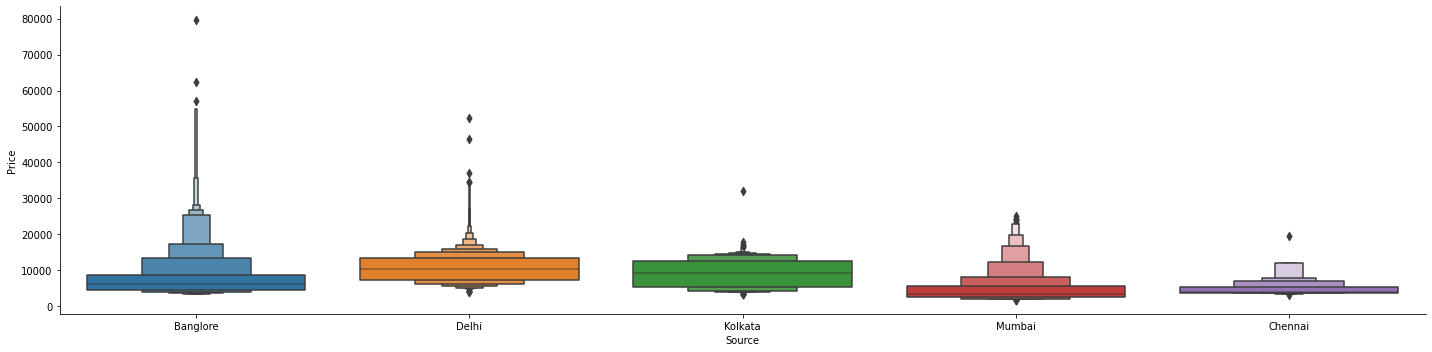

In [ ]:
sns.catplot(y = "Price",x = "Source",data = train_data.sort_values(by = "Price", ascending = False),kind = "boxen",height = 5,aspect = 4)

In [ ]:
Source = train_data[["Source"]]
Source = pd.get_dummies(Source , drop_first = True)
Source.head()

,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,0,0,0,0
1,0,0,1,0
2,0,1,0,0
3,0,0,1,0
4,0,0,0,0


In [ ]:
train_data["Destination"].value_counts()

Cochin       4536
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

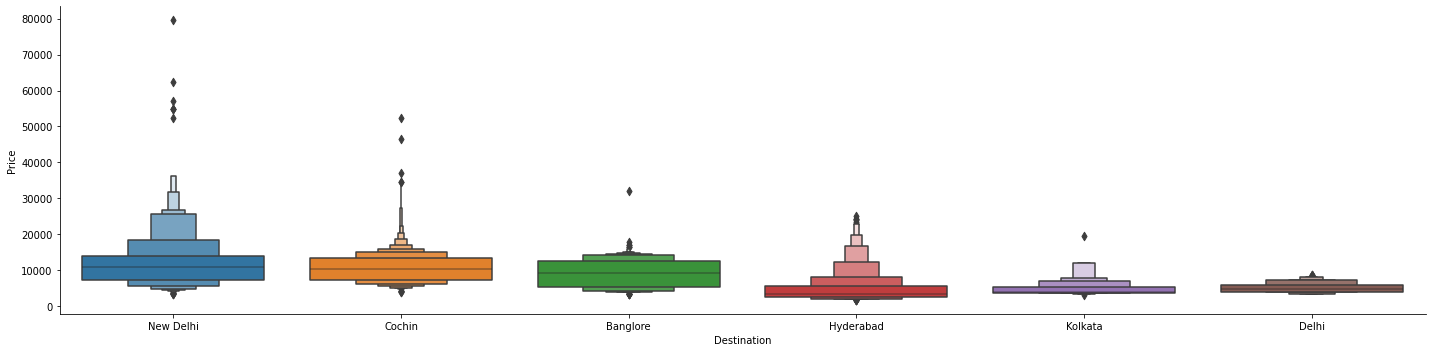

In [ ]:
sns.catplot(y= "Price",x = "Destination",data = train_data.sort_values(by = "Price", ascending = False),kind = "boxen",height = 5,aspect = 4)

In [ ]:
Destination = train_data[["Destination"]]
Destination = pd.get_dummies(Destination, drop_first = True)
Destination.head()

,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,0,0,0,1
1,0,0,0,0,0
2,1,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,1


In [ ]:
train_data["Route"]

0                    BLR → DEL
1        CCU → IXR → BBI → BLR
2        DEL → LKO → BOM → COK
3              CCU → NAG → BLR
4              BLR → NAG → DEL
                 ...          
10678                CCU → BLR
10679                CCU → BLR
10680                BLR → DEL
10681                BLR → DEL
10682    DEL → GOI → BOM → COK
Name: Route, Length: 10682, dtype: object

In [ ]:
train_data.drop(["Route","Additional_Info"],axis = 1, inplace = True)
train_data.head()

,Airline,Source,Destination,Total_Stops,Price,Journey_Day,Journey_Month,Dep_Hour,Dep_Min,Arrival_Hour,Arrival_Min,Duration_Hours,Duration_Mins
0,IndiGo,Banglore,New Delhi,non-stop,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2 stops,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,2 stops,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,1 stop,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,1 stop,13302,1,3,16,50,21,35,4,45


In [ ]:
train_data["Total_Stops"].value_counts()

1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64

In [ ]:
train_data.replace({"non-stop":0,"1 stop":1,"2 stops":2, "3 stops":3,"4 stops":4},inplace = True)
train_data.head()

,Airline,Source,Destination,Total_Stops,Price,Journey_Day,Journey_Month,Dep_Hour,Dep_Min,Arrival_Hour,Arrival_Min,Duration_Hours,Duration_Mins
0,IndiGo,Banglore,New Delhi,0,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,2,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,1,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,1,13302,1,3,16,50,21,35,4,45


In [ ]:
train_data.drop(["Airline","Source","Destination"], axis = 1, inplace = True)
data_train = pd.concat([train_data, Airline, Source, Destination],axis = 1)
data_train.head()

,Total_Stops,Price,Journey_Day,Journey_Month,Dep_Hour,Dep_Min,Arrival_Hour,Arrival_Min,Duration_Hours,Duration_Mins,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,3897,24,3,22,20,1,10,2,50,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,2,7662,1,5,5,50,13,15,7,25,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,2,13882,9,6,9,25,4,25,19,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,1,6218,12,5,18,5,23,30,5,25,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,1,13302,1,3,16,50,21,35,4,45,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [ ]:
data_train.shape

(10682, 30)

#Test Data

In [ ]:
test_data = pd.read_excel(r"/content/Test_set.xlsx")
test_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [ ]:
print("Test data info")
print("-"*70)
print(test_data.info())

print()
print()

print("Null values:")
print("-"*70)
print(test_data.isnull().sum())

test_data["Journey_day"] = pd.to_datetime(test_data.Date_of_Journey,format = "%d/%m/%Y").dt.day
test_data["Journey_month"] = pd.to_datetime(test_data.Date_of_Journey,format = "%d/%m/%Y").dt.month
test_data.drop(["Date_of_Journey"],axis =1, inplace = True)

test_data["Dep_hour"] = pd.to_datetime(test_data["Dep_Time"]).dt.hour
test_data["Dep_min"] = pd.to_datetime(test_data["Dep_Time"]).dt.minute
test_data.drop(["Dep_Time"], axis = 1,inplace =True)

test_data["Arrival_hour"] = pd.to_datetime(test_data["Arrival_Time"]).dt.hour
test_data["Arrival_min"] = pd.to_datetime(test_data["Arrival_Time"]).dt.minute
test_data.drop(["Arrival_Time"],axis = 1,inplace = True)

duration = list(test_data["Duration"])
for i in range(len(duration)):
  if len(duration[i].split()) != 2:
    if "h" in duration[i]:
      duration[i] = duration[i].strip() + " 0m"
    else:
      duration[i] = "0h " + duration[i]

duration_hours = []
duration_mins = []
for i in range (len(duration)):
  duration_hours.append(int(duration[i].split(sep = "h")[0]))
  duration_mins.append(int(duration[i].split(sep = "m")[0].split()[-1]))


print("Airline")
print("-"*70)
print(test_data["Airline"].value_counts())
Airline = pd.get_dummies(test_data["Airline"],drop_first = True)

print()

print("Source")
print("-"*70)
print(test_data["Source"].value_counts())
Source = pd.get_dummies(test_data["Source"],drop_first = True)

print()

print("Destination")
print("-"*70)
print(test_data["Destination"].value_counts())
Destination= pd.get_dummies(test_data["Destination"],drop_first = True)

test_data.drop(["Route","Additional_Info"], axis = 1,inplace = True)

test_data.replace({"non-stop":0,"1 stop":1,"2 stops":2,"3 stops":3,"4 stops":4})

test_data.drop(["Airline","Source","Destination"], axis = 1, inplace = True)
data_test = pd.concat([test_data, Airline,Source,Destination],axis = 1)

print()
print()

print("Shape of the Test Data")
data_test.shape

Test data info
----------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2671 entries, 0 to 2670
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          2671 non-null   object
 1   Date_of_Journey  2671 non-null   object
 2   Source           2671 non-null   object
 3   Destination      2671 non-null   object
 4   Route            2671 non-null   object
 5   Dep_Time         2671 non-null   object
 6   Arrival_Time     2671 non-null   object
 7   Duration         2671 non-null   object
 8   Total_Stops      2671 non-null   object
 9   Additional_Info  2671 non-null   object
dtypes: object(10)
memory usage: 208.8+ KB
None


Null values:
----------------------------------------------------------------------
Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival

(2671, 27)

In [ ]:
test_data.head()

,Duration,Total_Stops,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min
0,10h 55m,1 stop,6,6,17,30,4,25
1,4h,1 stop,12,5,6,20,10,20
2,23h 45m,1 stop,21,5,19,15,19,0
3,13h,1 stop,21,5,8,0,21,0
4,2h 50m,non-stop,24,6,23,55,2,45


#Feature Selection

In [ ]:
data_train.shape

(10682, 30)

In [ ]:
data_train.columns

Index(['Total_Stops', 'Price', 'Journey_Day', 'Journey_Month', 'Dep_Hour',
       'Dep_Min', 'Arrival_Hour', 'Arrival_Min', 'Duration_Hours',
       'Duration_Mins', 'Airline_Air India', 'Airline_GoAir', 'Airline_IndiGo',
       'Airline_Jet Airways', 'Airline_Jet Airways Business',
       'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Source_Chennai', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai',
       'Destination_Cochin', 'Destination_Delhi', 'Destination_Hyderabad',
       'Destination_Kolkata', 'Destination_New Delhi'],
      dtype='object')

In [ ]:
X = data_train.loc[:,['Total_Stops', 'Journey_Day', 'Journey_Month', 'Dep_Hour',
       'Dep_Min', 'Arrival_Hour', 'Arrival_Min', 'Duration_Hours',
       'Duration_Mins', 'Airline_Air India', 'Airline_GoAir', 'Airline_IndiGo',
       'Airline_Jet Airways', 'Airline_Jet Airways Business',
       'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Source_Chennai', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai',
       'Destination_Cochin', 'Destination_Delhi', 'Destination_Hyderabad',
       'Destination_Kolkata', 'Destination_New Delhi']]

X.head()

,Total_Stops,Journey_Day,Journey_Month,Dep_Hour,Dep_Min,Arrival_Hour,Arrival_Min,Duration_Hours,Duration_Mins,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,24,3,22,20,1,10,2,50,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,2,1,5,5,50,13,15,7,25,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,2,9,6,9,25,4,25,19,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,1,12,5,18,5,23,30,5,25,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,1,1,3,16,50,21,35,4,45,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [ ]:
y= data_train.iloc[:,1]
y.head()

0     3897
1     7662
2    13882
3     6218
4    13302
Name: Price, dtype: int64

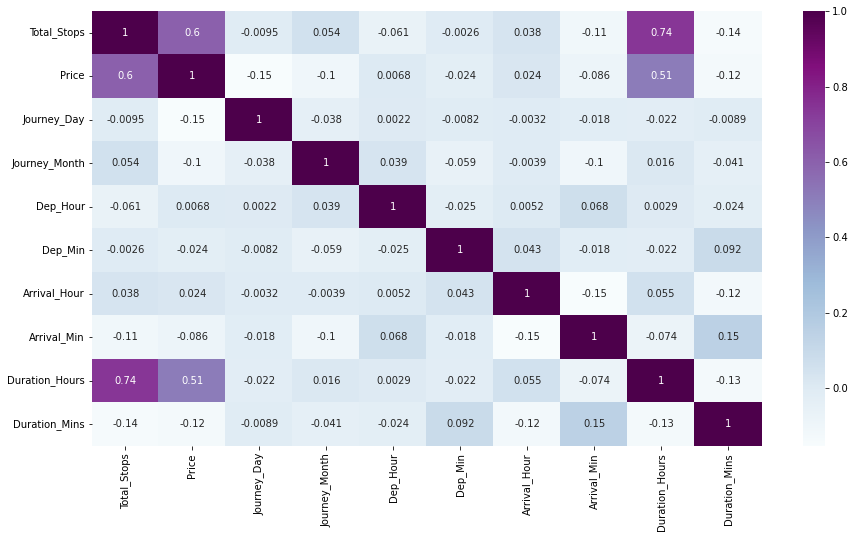

In [ ]:
plt.figure(figsize = (15,8))
sns.heatmap(train_data.corr(),cmap = "BuPu",annot = True)
plt.show()

In [ ]:
from sklearn.ensemble import ExtraTreesRegressor
selection = ExtraTreesRegressor()
selection.fit(X,y)

ExtraTreesRegressor()

In [ ]:
print(selection.feature_importances_)

[2.24855704e-01 1.42892764e-01 5.41638449e-02 2.43517008e-02
 2.14180252e-02 2.84257505e-02 1.91335223e-02 1.18430065e-01
 1.74753933e-02 9.61415355e-03 1.66499376e-03 1.76914193e-02
 1.42975253e-01 6.78083155e-02 1.95264402e-02 8.82524468e-04
 2.93914943e-03 8.24680895e-05 4.88978082e-03 8.48102132e-05
 4.81689444e-04 9.94423973e-03 3.49726903e-03 6.91909127e-03
 1.10403320e-02 1.54101477e-02 8.31895574e-03 4.01024505e-04
 2.46811724e-02]


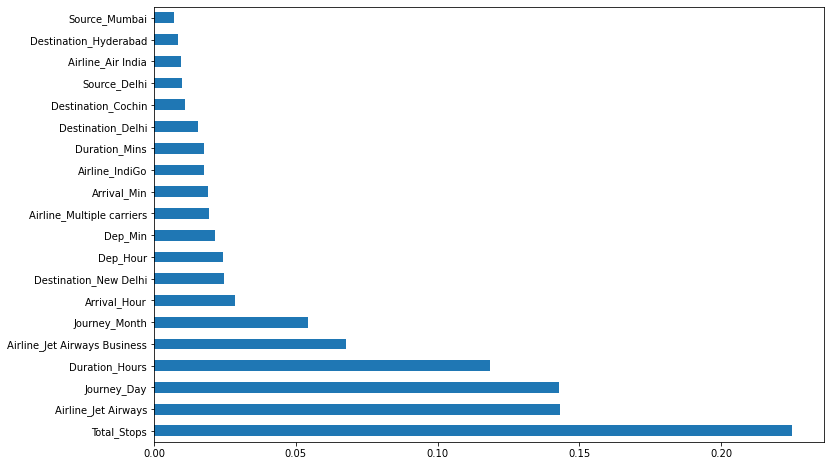

In [ ]:
plt.figure(figsize = (12,8))
feat_importances = pd.Series(selection.feature_importances_, index = X.columns)
feat_importances.nlargest(20).plot(kind = "barh")
plt.show()

#Linear Regression Model

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 42)

In [ ]:
from sklearn import linear_model
reg = linear_model.LinearRegression()
reg.fit(X_train, y_train)

LinearRegression()

In [ ]:
print("Coefficients: ",reg.coef_)
print("Variance Score: ", reg.score(X_test, y_test))

Coefficients:  [ 2.75697935e+03 -7.24895798e+01 -4.25346169e+02  2.02523760e+01
 -2.16957940e+00 -1.16972061e+01  2.20836501e+00  2.58973394e+00
 -1.90203371e+00  1.65862906e+03  2.02272697e+02  2.28394109e+02
  4.36753447e+03  4.77518757e+04  3.70553088e+03  4.06229450e+03
 -2.47404824e+02 -2.68126424e+03  2.07774779e+03  3.07890247e+03
  8.54374329e+00  5.69885538e+01  6.80900407e+00 -8.22250398e+02
  5.69885538e+01 -8.35738549e+02 -8.22250398e+02  8.54374329e+00
  1.58564765e+03]
Variance Score:  0.61959437290701


In [ ]:
y_pred = reg.predict(X_test)

In [ ]:
reg.score(X_train,y_train)

0.6240840020468166

In [ ]:
reg.score(X_test,y_test)

0.61959437290701

In [ ]:
from sklearn import metrics

In [ ]:
print("Mean Absolute Error: ", metrics.mean_absolute_error(y_test,y_pred))
print("Mean Squared Error: ", metrics.mean_squared_error(y_test,y_pred))
print("Root Mean Squared Error: ", np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

Mean Absolute Error:  1972.9372855148051
Mean Squared Error:  8202327.557407134
Root Mean Squared Error:  2863.9705929717807


In [ ]:
print("Score: ",metrics.r2_score(y_test,y_pred))

Score:  0.61959437290701


#Random Forest Model

In [ ]:
from sklearn.ensemble import RandomForestRegressor
reg_rf = RandomForestRegressor()
reg_rf.fit(X_train,y_train) 

RandomForestRegressor()

In [ ]:
y1_pred = reg_rf.predict(X_test)

In [ ]:
reg_rf.score(X_train,y_train)

0.9515443153920594

In [ ]:
reg_rf.score(X_test,y_test)

0.7970013354474519

In [ ]:
from sklearn import metrics

In [ ]:
print("Mean Absolute Error: ", metrics.mean_absolute_error(y_test,y1_pred))
print("Mean Squared Error: ",metrics.mean_squared_error(y_test,y1_pred))
print("Root Mean Squared Error: ", np.sqrt(metrics.mean_squared_error(y_test,y1_pred)))

Mean Absolute Error:  1175.9176231656736
Mean Squared Error:  4377068.638811667
Root Mean Squared Error:  2092.144507153286


In [ ]:
print("Score: ",metrics.r2_score(y_test,y1_pred))

Score:  0.7970013354474519


#Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeRegressor
reg_dt = DecisionTreeRegressor()
reg_dt.fit(X_train,y_train)

DecisionTreeRegressor()

In [ ]:
y2_pred = reg_dt.predict(X_test)

In [ ]:
reg_dt.score(X_train,y_train)

0.9692484150527355

In [ ]:
reg_dt.score(X_test,y_test)

0.7325160576230549

In [ ]:
from sklearn import metrics

In [ ]:
print("Mean Absolute Error: ",metrics.mean_absolute_error(y_test,y2_pred))
print("Mean Squared Error: ",metrics.mean_squared_error(y_test,y2_pred))
print("Root Mean Squared Error: ",np.sqrt(metrics.mean_squared_error(y_test,y2_pred)))

Mean Absolute Error:  1321.3052955857122
Mean Squared Error:  5767503.831340535
Root Mean Squared Error:  2401.562789381226


In [ ]:
print("Score: ",metrics.r2_score(y_test,y2_pred))

Score:  0.7325160576230549


#Support Vector Regression

In [ ]:
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
reg_svr = make_pipeline(StandardScaler(), SVR(C= 1, epsilon = 0.2))
reg_svr.fit(X_train,y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svr', SVR(C=1, epsilon=0.2))])

In [ ]:
y3_pred = reg_svr.predict(X_test)

In [ ]:
reg_svr.score(X_train,y_train)

0.056511476946828676

In [ ]:
reg_svr.score(X_test,y_test)

0.055960321034518756

In [ ]:
from sklearn import metrics

In [ ]:
print("Mean Absolute Error: ",metrics.mean_absolute_error(y_test,y3_pred))
print("Mean Squared Error: ",metrics.mean_squared_error(y_test,y3_pred))
print("Root Mean Squared Error: ", np.sqrt(metrics.mean_squared_error(y_test,y3_pred)))

Mean Absolute Error:  3412.026461969966
Mean Squared Error:  20355436.730097316
Root Mean Squared Error:  4511.6999822791095


In [ ]:
print("Score: ", metrics.r2_score(y_test,y3_pred))

Score:  0.055960321034518756


#Lasso Regression

In [ ]:
from sklearn.linear_model import Lasso
reg_lr = Lasso(alpha = 1.0)
reg_lr.fit(X_train,y_train)

Lasso()

In [ ]:
y4_pred = reg_lr.predict(X_test)

In [ ]:
reg_lr.score(X_train,y_train)

0.6238132886849226

In [ ]:
reg_lr.score(X_test,y_test)

0.6190467615317858

In [ ]:
from sklearn import metrics

In [ ]:
print("Mean Absolute Error: ",metrics.mean_absolute_error(y_test,y4_pred))
print("Mean Squared Error: ",metrics.mean_squared_error(y_test,y4_pred))
print("Root Mean Squared Error: ", np.sqrt(metrics.mean_squared_error(y_test,y4_pred)))

Mean Absolute Error:  1974.105261137971
Mean Squared Error:  8214135.1847234685
Root Mean Squared Error:  2866.031260248825


In [ ]:
print("Score: ",metrics.r2_score(y_test,y4_pred))

Score:  0.6190467615317858


##Comparing the R2 scores 5 models we can see that Random Forest is the best suited


#Hyperparameter Tuning

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
n_estimators = [int(x) for x in np.linspace(start = 100,stop = 1200,num = 12)]
max_features = ['auto','sqrt']
max_depth = [int(x) for x in np.linspace(5,30,num =6)]
min_samples_split = [2,5,10, 15,100]
min_samples_leaf = [1,2,5,10]

In [ ]:
random_grid = {'n_estimators':n_estimators,
               'max_features':max_features,
               'max_depth':max_depth,
               'min_samples_split':min_samples_split,
               'min_samples_leaf':min_samples_leaf}

In [ ]:
rf_random = RandomizedSearchCV(estimator = reg_rf,param_distributions = random_grid, scoring='neg_mean_squared_error',n_iter = 10,cv = 5,verbose = 2, random_state = 42,n_jobs = 1) 

In [ ]:
rf_random.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   3.8s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   3.8s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   3.8s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   3.8s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   3.8s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   5.7s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   5.7s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimator

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [ ]:
rf_random.best_params_

{'max_depth': 20,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 15,
 'n_estimators': 700}

In [ ]:
prediction = rf_random.predict(X_test)

<Figure size 576x576 with 0 Axes>

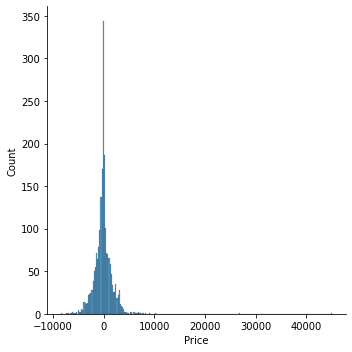

In [ ]:
plt.figure(figsize = (8,8))
sns.displot(y_test-prediction)
plt.show()

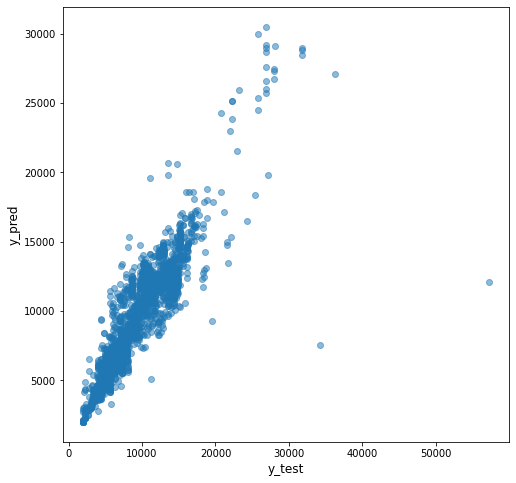

In [ ]:
plt.figure(figsize = (8,8))
plt.scatter(y_test,prediction, alpha = 0.5)
plt.xlabel("y_test",fontsize = 12)
plt.ylabel('y_pred',fontsize = 12)
plt.show()

In [ ]:
print("Mean Absolute Error: ",metrics.mean_absolute_error(y_test,prediction))
print("Mean Squared Error: ",metrics.mean_squared_error(y_test,prediction))
print("Root Mean Squared Error: ",np.sqrt(metrics.mean_squared_error(y_test,prediction)))

Mean Absolute Error:  1166.7189165335683
Mean Squared Error:  4061566.299206263
Root Mean Squared Error:  2015.332801104141


#Saving the Model

In [ ]:
import pickle
file = open('flight_fare_rf.pk1','wb')
pickle.dump(rf_random,file)

In [ ]:
model = open('flight_fare_rf.pk1','rb')
forest = pickle.load(model)

In [ ]:
y_prediction = forest.predict(X_test)

In [ ]:
metrics.r2_score(y_test,y_prediction)

0.8116336290868976